# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('avito-category-prediction/train.csv')
test = pd.read_csv('avito-category-prediction/test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isnull().any()

title            False
description       True
Category_name    False
Category         False
dtype: bool

In [6]:
test.isnull().any()

title          False
description     True
itemid         False
dtype: bool

In [7]:
train['description'].fillna(value = '', inplace = True)

In [8]:
test['description'].fillna(value = '', inplace = True)

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [9]:
train['title_and_description'] = train['title'] + '/' + train['description']

In [10]:
test['title_and_description'] = test['title'] + '/' + test['description']

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [11]:
len(train['Category'].unique())

50

In [12]:
train['Category'].unique()

array([ 10,  21, 114,  27,  29,   9, 112,  39,  90,  20,  94,  36,  99,
       101,  84,  19,  30,  82,  32,  81,  24,  87, 111,  93,  42,  28,
        40, 105,  97,  83,  38,  88,  96,  25,  85,  26, 102, 106,  11,
        34,  31,  98,  14,  23,  89,  91,  92, 116,  33,  86])

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(20,10)})


/Users/igorgogarev/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

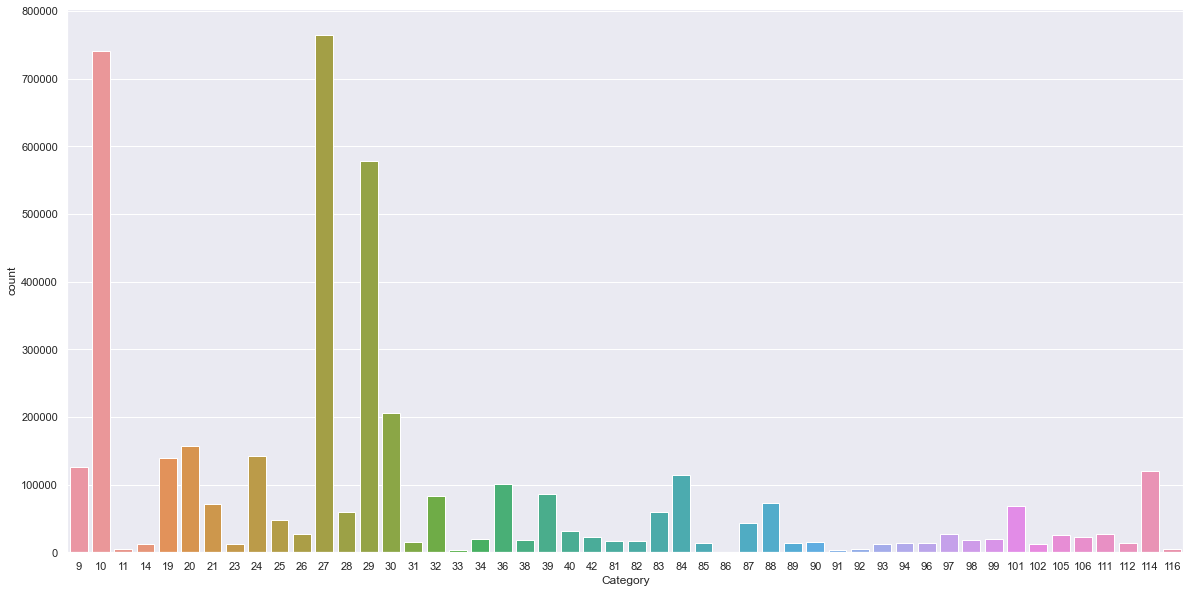

In [14]:
sns.countplot(train['Category'])

In [15]:
train['Category'].value_counts(normalize = True)

27     0.180707
10     0.174939
29     0.136394
30     0.048775
20     0.037018
24     0.033593
19     0.032756
9      0.029706
114    0.028378
84     0.026850
36     0.023761
39     0.020163
32     0.019681
88     0.017110
21     0.016754
101    0.016079
83     0.013948
28     0.013918
25     0.011392
87     0.010047
40     0.007590
111    0.006403
26     0.006381
97     0.006217
105    0.005854
106    0.005459
42     0.005179
34     0.004603
99     0.004599
98     0.004359
38     0.004138
81     0.004055
82     0.004012
90     0.003647
31     0.003524
89     0.003239
96     0.003236
85     0.003148
94     0.003136
112    0.003082
102    0.002874
93     0.002805
14     0.002798
23     0.002758
92     0.001235
11     0.001152
116    0.000974
91     0.000854
33     0.000682
86     0.000039
Name: Category, dtype: float64

Как видно из получившихся вычислений, разброс по категориям очень большой. Так, наиболее редко встречающася категория - 86 - встречается в 0.0000389 случаях, а самая максимальная - 27 - в 0.18 случаях


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer()

In [18]:
bow = vectorizer.fit_transform(train['title_and_description'])

In [19]:
bow.shape

(4234042, 2125805)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [20]:
from string import punctuation

In [21]:
words = vectorizer.vocabulary_

In [22]:
keys = list(words)
counter = 0
for i in range(len(keys)):
    if(keys[i][0].isdigit()):
        counter += 1
counter

610944

In [23]:
counter2 = 0
for i in range(len(keys)):
    if(keys[i][0] in punctuation):
        counter2 += 1
counter2

2043

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [24]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem.snowball import SnowballStemmer

In [25]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/igorgogarev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/igorgogarev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords

import numpy as np

In [27]:
numbers = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
noise = list(punctuation) + numbers + ['—' , '«' ,  '»']
s_words = stopwords.words('russian') 
stemmer = SnowballStemmer('russian')

In [28]:
def custom_tokenizer(s):
    s = s.lower()
    tokens = np.array(word_tokenize(s))
    to_delete_indexes = []
    for i in range(len(tokens)):
        for j in range(len(noise)):
            if(tokens[i].find(noise[j]) != -1):
                to_delete_indexes.append(i)
                break
    tokens = np.delete(tokens, to_delete_indexes)
    to_delete_indexes = []
    for i in range(len(tokens)):
        for j in range(len(s_words)):
            if tokens[i] == s_words[j]:
                to_delete_indexes.append(i)
                break
    return [stemmer.stem(w) for w in np.delete(tokens, to_delete_indexes)]

In [29]:
custom_tokenizer(train['title_and_description'][0])

['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kangoo',
 'канг',
 'канг',
 'мега',
 'сценик',
 'laguna',
 'лагун',
 'clio',
 'кли',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [30]:
self_vectorizer = CountVectorizer(tokenizer = custom_tokenizer)

In [31]:
work_data = train.sample(100000)

In [32]:
work_data.head()

,title,description,Category_name,Category,title_and_description
281525,Колеса зима R16 5x100 DIA 67.1 ET45,Колеса в сборе. Зимняя нешипованная резина./\n...,Запчасти и аксессуары,10,Колеса зима R16 5x100 DIA 67.1 ET45/Колеса в с...
3104163,Багажник для audi Q5,"Оригинал,новый. Покупался за 12000 руб. На авт...",Запчасти и аксессуары,10,"Багажник для audi Q5/Оригинал,новый. Покупался..."
3886975,"Панель приборов. Ducato, Jumper, Boxer","Панель приборов Подходит на Fiat Ducato, Citro...",Запчасти и аксессуары,10,"Панель приборов. Ducato, Jumper, Boxer/Панель ..."
1231286,Юбка новая,"Абсолютно новая юбка, с бирочкой. Подойдёт на ...","Одежда, обувь, аксессуары",27,"Юбка новая/Абсолютно новая юбка, с бирочкой. П..."
3394436,Человек паук на ps4,"Игра в отличном состоянии, приобретена 2 месяц...","Игры, приставки и программы",97,"Человек паук на ps4/Игра в отличном состоянии,..."


In [33]:
self_bow = self_vectorizer.fit_transform(work_data['title_and_description'])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(self_bow, work_data['Category'], test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [37]:
clf = SGDClassifier()

In [38]:
clf.fit(X_train, y_train)

SGDClassifier()

In [39]:
accuracy_score(y_test, clf.predict(X_test))

0.7825

In [58]:
self_bow.shape

(100000, 89220)

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tf_vectorizer = TfidfVectorizer(tokenizer = custom_tokenizer)

In [42]:
tf_idf_bow = tf_vectorizer.fit_transform(work_data['title_and_description'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_bow, work_data['Category'], test_size=0.2, random_state=42)

In [44]:
clf.fit(X_train, y_train)

SGDClassifier()

In [45]:
accuracy_score(y_test, clf.predict(X_test))

0.78495

In [59]:
tf_idf_bow.shape

(100000, 89220)

In [46]:
tf_vectorizer_2 = TfidfVectorizer(tokenizer = custom_tokenizer, max_df = 0.9)

In [47]:
tf_idf_bow_2 = tf_vectorizer_2.fit_transform(work_data['title_and_description'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_bow_2, work_data['Category'], test_size=0.2, random_state=42)

In [49]:
clf.fit(X_train, y_train)

SGDClassifier()

In [50]:
accuracy_score(y_test, clf.predict(X_test))

0.78575

In [61]:
tf_idf_bow_2.shape

(100000, 89220)

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [51]:
from sklearn.feature_extraction.text import HashingVectorizer

In [52]:
hashingVectorizer = HashingVectorizer(n_features = 30000, tokenizer = custom_tokenizer)

In [53]:
hash_bow = hashingVectorizer.fit_transform(work_data['title_and_description'])

/Users/igorgogarev/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [54]:
X_train, X_test, y_train, y_test = train_test_split(hash_bow, work_data['Category'], test_size=0.2, random_state=42)

In [55]:
clf.fit(X_train, y_train)

SGDClassifier()

In [56]:
accuracy_score(y_test, clf.predict(X_test))

0.76595

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [57]:
from sklearn.linear_model import LogisticRegression

In [35]:
test.head()

,title,description,itemid,title_and_description
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823,Мастерка/Мастерка фирмы форвард. Белого цвета....
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962,"Зимние сапоги/Продаю зимние сапоги, в хорошем ..."
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804,Видеонаблюдение 8 камер/В комплект Atis AMD-2M...
3,Запчасти для GLE,Запчасти GLE,1689811299,Запчасти для GLE/Запчасти GLE
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240,Бластер nerf/Состояние 5+/\nПродаю потому что ...


In [36]:
work_data_test = train.sample(700000)

In [37]:
tf_vectorizer_test = TfidfVectorizer(tokenizer = custom_tokenizer, max_df = 0.8)

In [38]:
tf_idf_bow_2 = tf_vectorizer_test.fit_transform(work_data_test['title_and_description'])

In [39]:
test_bow = tf_vectorizer_test.transform(test['title_and_description'])

In [40]:
indexes = np.array(test['itemid'])

In [41]:
clf = SGDClassifier()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_bow_2, work_data_test['Category'], test_size=0.2, random_state=42)

In [60]:
lr = LogisticRegression(max_iter = 1000, C = 3)

In [61]:
lr.fit(X_train, y_train)

LogisticRegression(C=3, max_iter=1000)

In [55]:
answers = lr.predict(test_bow)

In [134]:
my_file = open("submission.csv", "w")
my_file.write('Id,Category\n')
for i in range(len(answers)):
    my_file.write(str(indexes[i]) + ','+ str(answers[i]) + '\n')
my_file.close()